Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


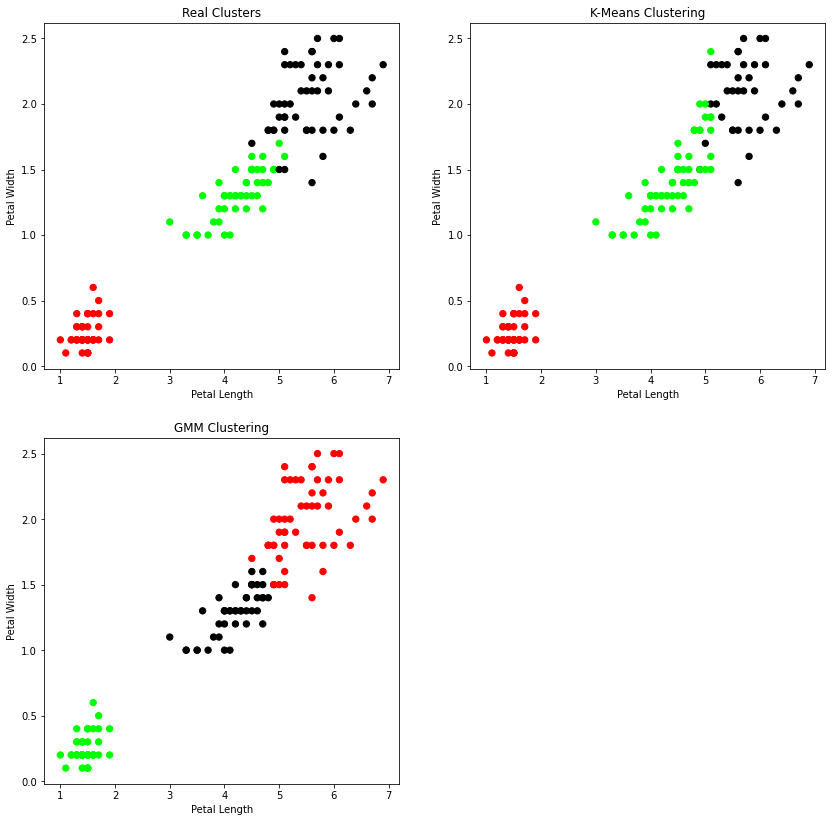

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np


names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']
dataset = pd.read_csv("8dataset.csv", names=names)
X = dataset.iloc[:, :-1]  
label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 
y = [label[c] for c in dataset.iloc[:, -1]]


model = KMeans(n_clusters=3)
model.fit(X) 

plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)


plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')